In [38]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656


In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/179895/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [11]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [12]:
df_in_2015 = df[(df['year'] == 2015)]

In [13]:
df_in_2015.groupby('month')['post_id'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1504.0,248929.076463,10675.492642,92969.0,244595.5,247616.0,248657.5,288442.0
2,1793.0,254901.199665,14873.489216,166041.0,246118.0,250075.0,251409.0,288972.0
3,2189.0,257403.056647,15186.857137,92787.0,247766.0,252671.0,254207.0,296674.0
4,2110.0,260829.483412,15473.677078,184278.0,249494.5,255461.0,256888.5,290202.0
5,1799.0,262177.445247,15110.889277,189660.0,250889.0,257717.0,258984.0,296678.0
6,2004.0,264159.280938,14825.794476,245488.0,252381.5,259920.0,261307.5,292102.0
7,2111.0,267000.261487,15302.072815,139898.0,259169.0,262391.0,263834.0,293224.0
8,1849.0,269531.026501,13125.596164,242382.0,260618.0,264455.0,265651.0,294098.0
9,1944.0,270921.415638,12482.808114,217543.0,262731.5,266535.0,267795.5,294976.0


In [14]:
df_in_2016 = df[(df['year'] == 2016)]
df_in_2016.groupby('month')['post_id'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1717.0,276514.087362,10119.258308,249515.0,269496.0,274639.0,275855.0,298302.0
2,1819.0,278044.794393,11113.025244,114047.0,271181.0,276581.0,277742.0,299006.0
3,2115.0,280181.529551,9522.832553,210772.0,273035.0,278823.0,280190.0,299812.0
4,1910.0,282058.416230,10421.363982,98770.0,274663.5,281195.0,282447.5,300542.0
5,1726.0,287104.884125,12503.311815,171475.0,275998.5,283142.0,301133.5,302336.0
6,1498.0,292482.926569,13983.699844,161011.0,277446.5,302618.0,303537.5,304524.0
7,1278.0,295022.553991,13995.710525,151092.0,278641.0,304821.0,305921.5,306822.0
8,1278.0,298431.615023,14342.915709,123238.0,279760.5,307259.0,308065.5,308962.0
9,1482.0,300409.763833,14048.630002,230985.0,280782.5,309460.0,310419.5,311472.0


In [15]:
df_in_2015_03 = df_in_2015[df_in_2015['month'] == 3]

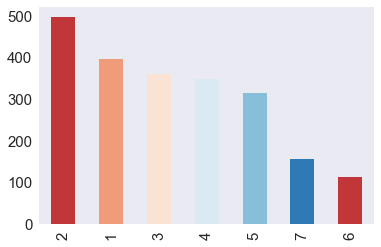

In [16]:
df_in_2015_03['dayofweek'].value_counts().plot(kind='bar')

In [17]:
df_in_2015_03 = df_in_2015_03[['dayofweek'] + ['domain']]

In [18]:
df_in_2015_03.head(3)

,dayofweek,domain
97666,7,habrahabr.ru
97667,7,habrahabr.ru
97668,7,habrahabr.ru


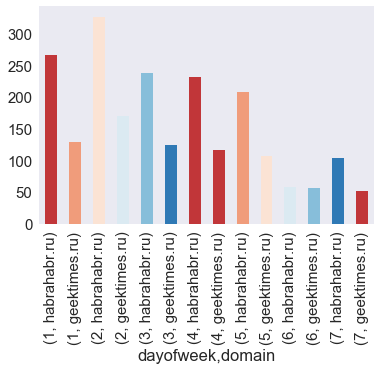

In [19]:
df_in_2015_03.groupby('dayofweek')['domain'].value_counts().plot(kind='bar')

In [20]:
df.groupby('hour')['post_id'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,4079.0,168120.628831,80967.846000,18316.0,107135.00,156347.0,247875.50,313972.0
1,3149.0,162485.714830,82008.640932,18291.0,99884.00,148258.0,245512.00,313974.0
2,2272.0,163583.386444,81912.769844,18367.0,99726.25,149760.0,245698.50,313950.0
3,1558.0,160226.364570,82119.989148,18553.0,95364.50,147234.5,242188.50,313980.0
4,1100.0,157350.988182,78422.460247,18396.0,98789.25,147083.5,225144.50,313806.0
5,851.0,159812.991774,78540.235698,18501.0,98283.00,146746.0,231441.00,313254.0
6,1048.0,176417.841603,81721.766827,18397.0,110977.00,171098.0,257480.25,312158.0
7,1438.0,180619.888039,81825.651318,18686.0,111321.50,180820.0,258017.50,313926.0
8,2520.0,190074.404762,80853.675668,19671.0,123203.00,202549.0,262627.50,313982.0


In [21]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [22]:
df_views_and_comments_by_publish_hour = df[['hour'] + ['views']+['comments']]

In [23]:
df_views_and_comments_by_publish_hour.shape

(134137, 3)

In [24]:
df_views_and_comments_by_publish_hour.head()

,hour,views,comments
0,18,236,0
1,18,353,1
2,18,1200,47
3,1,5700,102
4,14,1400,230


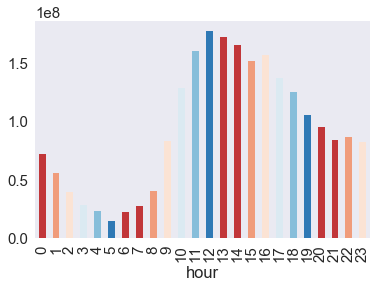

In [25]:
df_views_and_comments_by_publish_hour.groupby('hour')['views'].sum().plot(kind='bar')

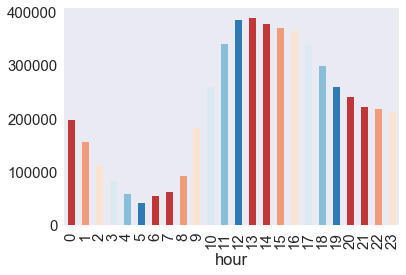

In [26]:
df_views_and_comments_by_publish_hour.groupby('hour')['comments'].sum().plot(kind='bar')

In [27]:
df_authors_by_minuses = df[['author'] + ['votes_minus']]

In [28]:
df_authors_by_minuses.groupby('author')['votes_minus'].sum().sort_values()

author
@Archon               0.0
@silverjoe            0.0
@silvercaptain        0.0
@gor2991              0.0
@silenzushka          0.0
@silentvick           0.0
@voychitskaya         0.0
@vpiskunov            0.0
@sielover             0.0
@kooheboos            0.0
@Old_Nick             0.0
@koplyarov_da         0.0
@WinPooh73            0.0
@kentastik            0.0
@koras_dor            0.0
@Sovent               0.0
@shvlad               0.0
@HellHounD            0.0
@jam31                0.0
@Sp1tF1r3             0.0
@belosnezhka          0.0
@leocat33             0.0
@leoleovich           0.0
@siplix               0.0
@Wintch               0.0
@GuestOne             0.0
@QuickWind            0.0
@sinpo                0.0
@Gulenkov112          0.0
@volodymyr            0.0
                   ...   
@grokru            1469.0
@Mairon            1469.0
@Shpankov          1506.0
@amarao            1535.0
@veveve            1536.0
@mixen             1620.0
@jeje              1673.0
@rage

In [29]:
df_publish_by_day_and_hour = df[['dayofweek']+['hour']]

In [30]:
df_publish_by_day_and_hour[df_publish_by_day_and_hour['dayofweek'] == 1]

,dayofweek,hour
35,1,1
36,1,1
37,1,4
38,1,6
39,1,6
40,1,12
41,1,13
42,1,15
43,1,15
44,1,17


In [31]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [54]:
year_posts = df.groupby('year')[['post_id']].count().join(df.groupby('year')[['views']].sum()).join(df.groupby('year')[['content_len']].sum())
year_posts.head()

,post_id,views,content_len
year,,,
2008,7743,28472271,25252671
2009,10783,59189345,46260203
2010,13091,97629071,66065443
2011,15063,167280775,90483152
2012,15972,324290374,107470135


In [48]:
df[df['year'] == 2008].shape #Проверка

(7743, 18)

In [55]:
year_posts.columns = ['Posts', 'Views', 'Content']

In [59]:
trace0 = go.Scatter(
    x=year_posts.index,
    y=year_posts.Posts,
    name='Количество постов'
)
trace1 = go.Scatter(
    x=year_posts.index,
    y=year_posts.Views,
    name='Количество просмотров'
)
trace2 = go.Scatter(
    x=year_posts.index,
    y=year_posts.Content,
    name='Общее количество знаков в постах'
)

In [60]:
data = [trace0, trace1, trace2]
layout = {'title': 'Статистика постов на Хабре'}

In [61]:
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [62]:
plotly.offline.plot(fig, filename='Посты на хабре.html', show_link=False)

'file://C:\\Users\\User\\PycharmProjects\\Machine Learning with Jupiter\\Topic 2 - Data Visualization with Seaborn, Plotly and visual data analysis\\Посты на хабре.html'

In [67]:
flows_posts = df.groupby('flow')[['post_id']].count()
flows_posts.columns = ['Count']
flows_posts.sort_values('Count', ascending=False, inplace=True)
flows_posts.head()

,Count
flow,
develop,53318
misc,23104
admin,7902
management,6815
design,3320


In [69]:
trace0 = go.Bar(
            x=flows_posts.index,
            y=flows_posts.Count,
            name='Количество постов')

In [70]:
data = [trace0]
layout = {'title': 'Посты по потокам', 'xaxis': {'title': 'Потоки'}}

In [71]:
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1, show_link=False)

In [72]:
plotly.offline.plot(fig1, filename='Посты по потокам.html', show_link=False)

'file://C:\\Users\\User\\PycharmProjects\\Machine Learning with Jupiter\\Topic 2 - Data Visualization with Seaborn, Plotly and visual data analysis\\Посты по потокам.html'